## Imports

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import RandomizedSearchCV

## Load the dataset

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Exploratory Data Analysis

### Quick overview and statistics, check if null and remove duplicates

In [4]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
data.drop('customerID', axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


There are no missing values in the dataset

In [7]:
data.duplicated().sum()

22

We have 22 duplicate rows. Let's delete them.

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894
std,0.368947,24.534965,30.069001
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


### Check the different possible values of all the features and their distribution.

In [10]:
for column in data.columns:
    print(data[column].value_counts(),'\n')

Male      3541
Female    3480
Name: gender, dtype: int64 

0    5880
1    1141
Name: SeniorCitizen, dtype: int64 

No     3619
Yes    3402
Name: Partner, dtype: int64 

No     4911
Yes    2110
Name: Dependents, dtype: int64 

1     591
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64 

Yes    6339
No      682
Name: PhoneService, dtype: int64 

No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64 

No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64 

No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64 

No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: 

In [11]:
data.Churn.value_counts()/data.Churn.value_counts().sum()

No     0.735508
Yes    0.264492
Name: Churn, dtype: float64

As we can see here, the dataset is quite unbalanced with a 75%/25% repartition between 'No churn' and 'Churn'. We will take care of this later.

### Some visualisations

In [12]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

What we would like to see:
- Churn repartition according to each of the other features

C:\Users\ggimo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


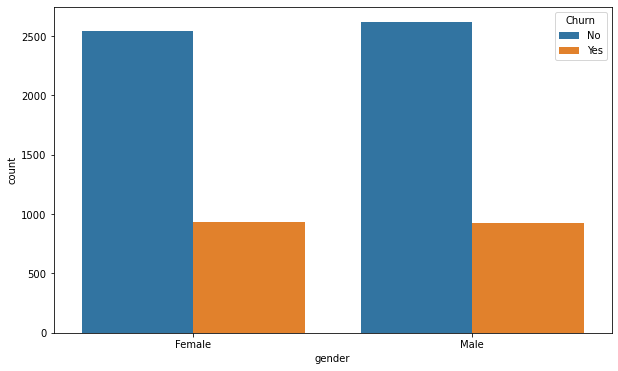

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data['gender'], hue=data['Churn'])
plt.show()

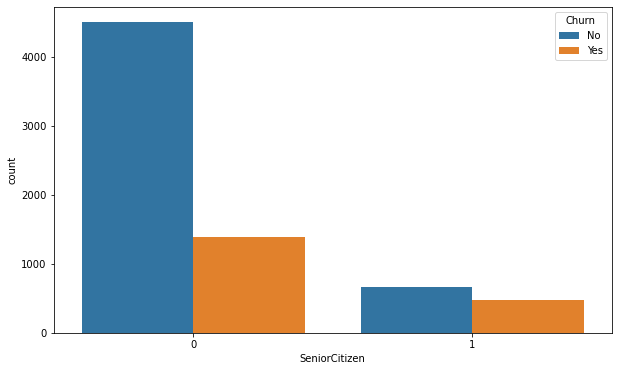

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['SeniorCitizen'], hue=data['Churn'])
plt.show()

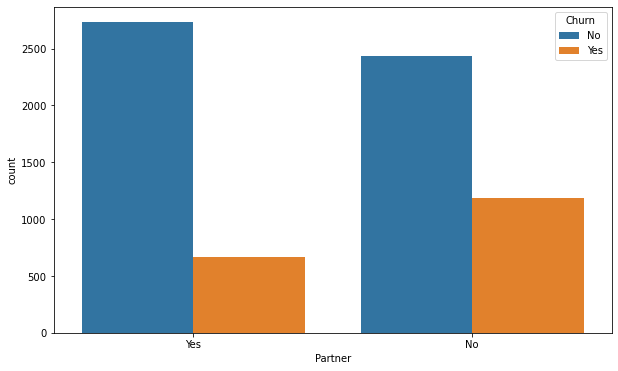

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['Partner'], hue=data['Churn'])
plt.show()

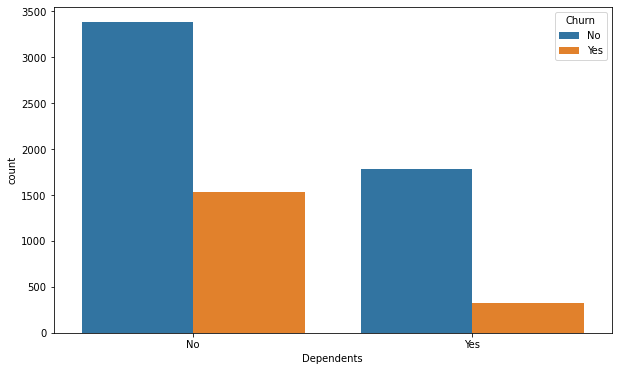

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['Dependents'], hue=data['Churn'])
plt.show()

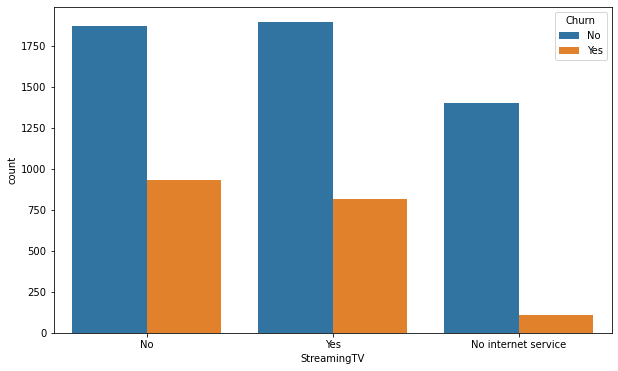

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['StreamingTV'], hue=data['Churn'])
plt.show()

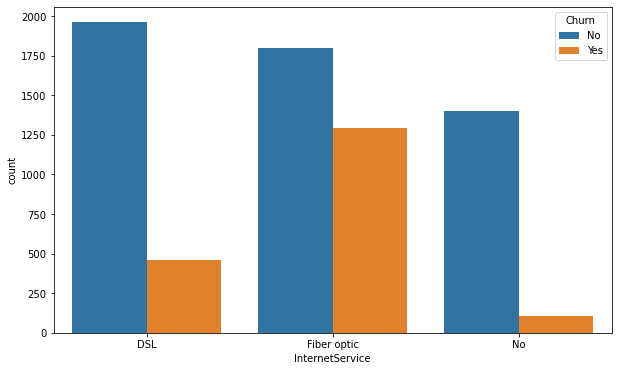

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['InternetService'], hue=data['Churn'])
plt.show()

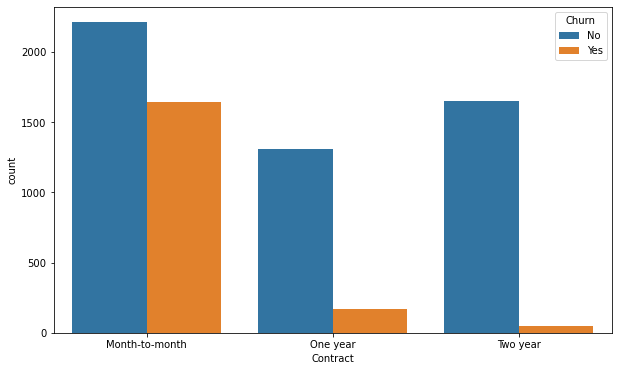

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['Contract'], hue=data['Churn'])
plt.show()

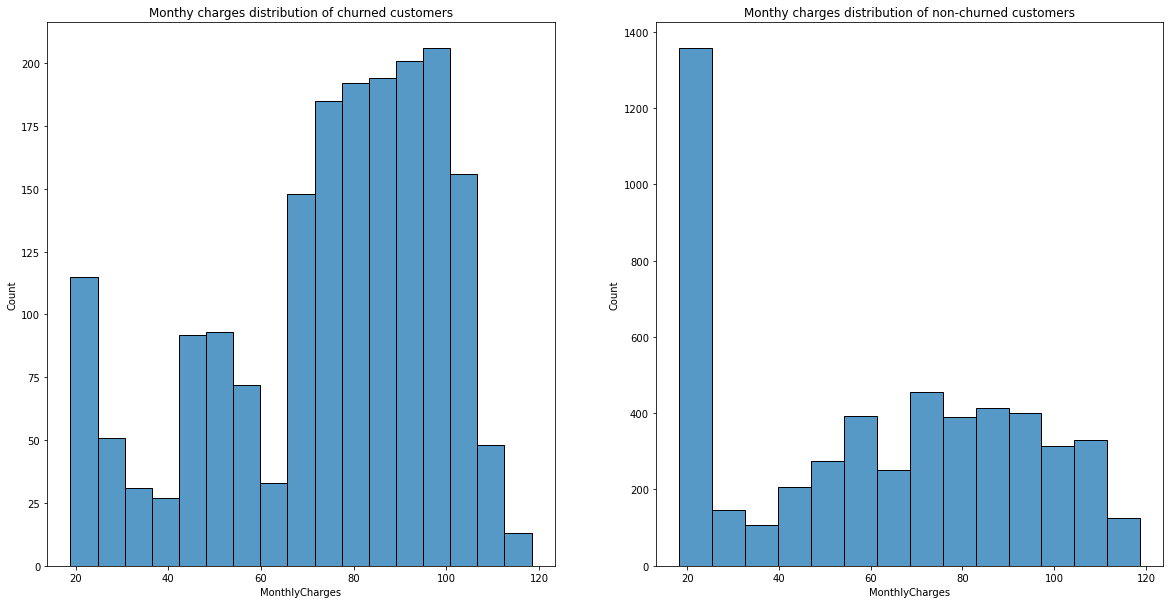

In [26]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,2,1)
sns.histplot(x=data[data['Churn']=='Yes']['MonthlyCharges'])
ax1.set_title('Monthy charges distribution of churned customers')
ax2 = plt.subplot(1,2,2)
sns.histplot(x=data[data['Churn']=='No']['MonthlyCharges'])
ax2.set_title('Monthy charges distribution of non-churned customers')
plt.show()

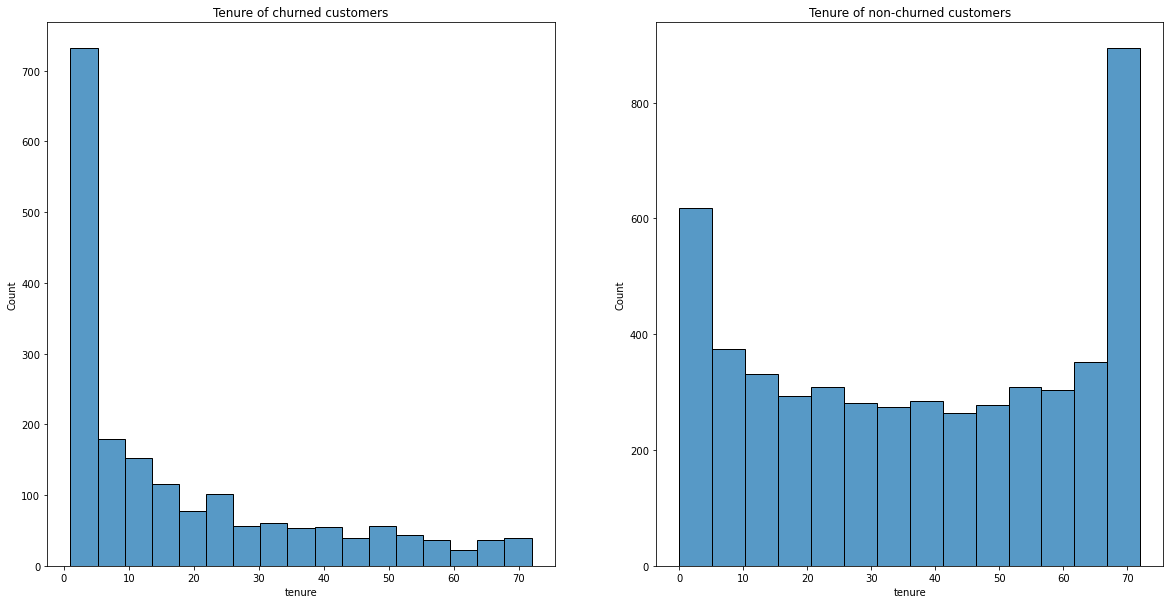

In [27]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,2,1)
sns.histplot(x=data[data['Churn']=='Yes']['tenure'])
ax1.set_title('Tenure of churned customers')
ax2 = plt.subplot(1,2,2)
sns.histplot(x=data[data['Churn']=='No']['tenure'])
ax2.set_title('Tenure of non-churned customers')
plt.show()

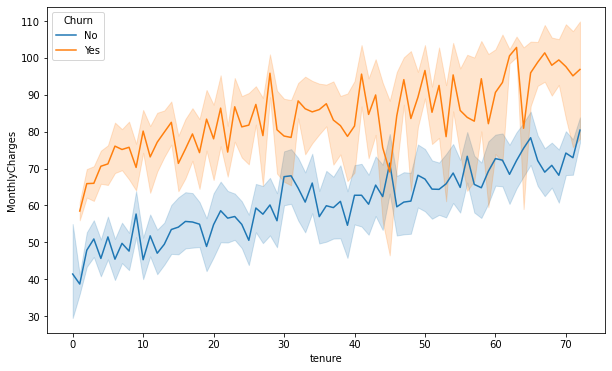

In [29]:
plt.figure(figsize=(10,6))
sns.lineplot(x=data['tenure'], y=data['MonthlyCharges'], hue=data['Churn'])
plt.show()

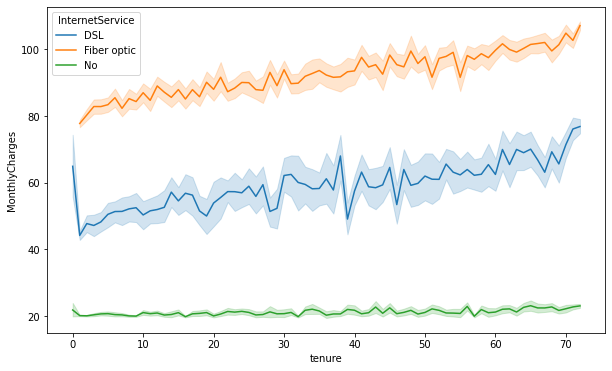

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=data['tenure'], y=data['MonthlyCharges'], hue=data['InternetService'])
plt.show()

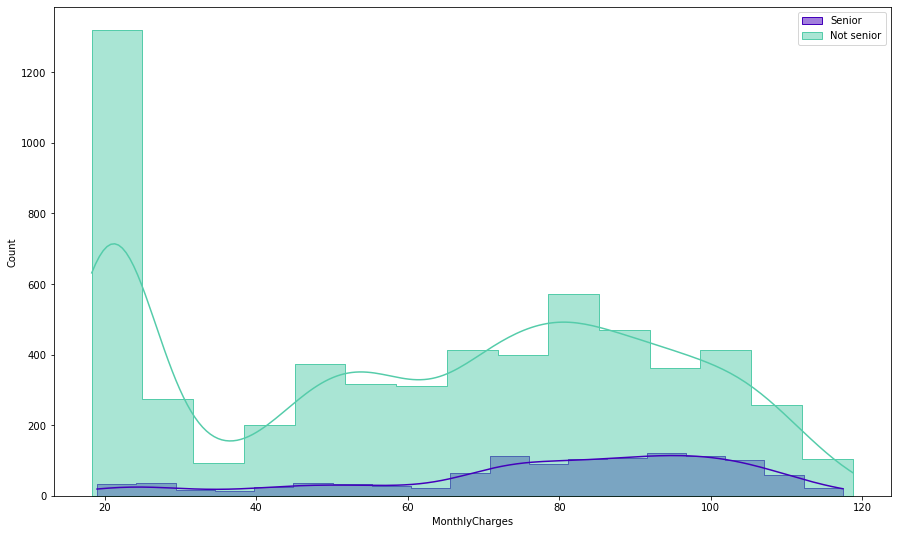

In [45]:
plt.figure(figsize=(15,9))
sns.histplot(data[data['SeniorCitizen']==1]['MonthlyCharges'], label='Senior', color = "#4400BB", kde=True, element="step")
sns.histplot(data[data['SeniorCitizen']==0]['MonthlyCharges'], label='Not senior', color = "#55CCAA", kde=True, element="step")
plt.legend()
plt.show()

### Feature Engineering

### Feature cleaning (categorical data)

In [46]:
data_clean = data.copy()

In [47]:
gender_map = {'Female': 0, 'Male': 1}
yes_no_map = {'Yes': 1, 'No': 0}

In [48]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [49]:
data_clean.gender = data_clean.gender.map(gender_map)

In [50]:
for column in yes_no_columns:
    data_clean[column] = data_clean[column].map(yes_no_map)

In [51]:
multi_label_columns = ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [52]:
dummies = pd.get_dummies(data_clean[multi_label_columns], drop_first=True)

In [53]:
data_clean = pd.concat([data_clean.drop(multi_label_columns, axis=1), dummies], axis=1)

In [54]:
data_clean

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,1,0,1,29.85,29.85,No,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,34,1,0,56.95,1889.5,No,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,2,1,1,53.85,108.15,Yes,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,No,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,Yes,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.5,No,...,0,0,0,1,0,1,0,1,0,1
7039,0,0,1,1,72,1,1,103.20,7362.9,No,...,0,1,0,1,0,0,0,1,0,1
7040,0,0,1,1,11,0,1,29.60,346.45,No,...,0,0,0,0,0,0,0,0,0,0
7041,1,1,1,0,4,1,1,74.40,306.6,Yes,...,0,0,0,0,0,0,0,0,0,0


In [55]:
num_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [56]:
data_clean=data_clean.drop('TotalCharges', axis=1)

In [57]:
data_clean

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No phone service,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,1,0,1,29.85,No,1,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,34,1,0,56.95,No,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,2,1,1,53.85,Yes,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,45,0,0,42.30,No,1,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,Yes,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,No,0,...,0,0,0,1,0,1,0,1,0,1
7039,0,0,1,1,72,1,1,103.20,No,0,...,0,1,0,1,0,0,0,1,0,1
7040,0,0,1,1,11,0,1,29.60,No,1,...,0,0,0,0,0,0,0,0,0,0
7041,1,1,1,0,4,1,1,74.40,Yes,0,...,0,0,0,0,0,0,0,0,0,0


## Market Segmentation

In [58]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7021 non-null   int64  
 1   SeniorCitizen                          7021 non-null   int64  
 2   Partner                                7021 non-null   int64  
 3   Dependents                             7021 non-null   int64  
 4   tenure                                 7021 non-null   int64  
 5   PhoneService                           7021 non-null   int64  
 6   PaperlessBilling                       7021 non-null   int64  
 7   MonthlyCharges                         7021 non-null   float64
 8   Churn                                  7021 non-null   object 
 9   MultipleLines_No phone service         7021 non-null   uint8  
 10  MultipleLines_Yes                      7021 non-null   uint8  
 11  Inte

In [59]:
from sklearn.manifold import TSNE

In [60]:
tsne = TSNE(n_components=2)

In [61]:
data_clean_reduced = tsne.fit_transform(data_clean.drop('Churn', axis=1))

C:\Users\ggimo\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ggimo\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


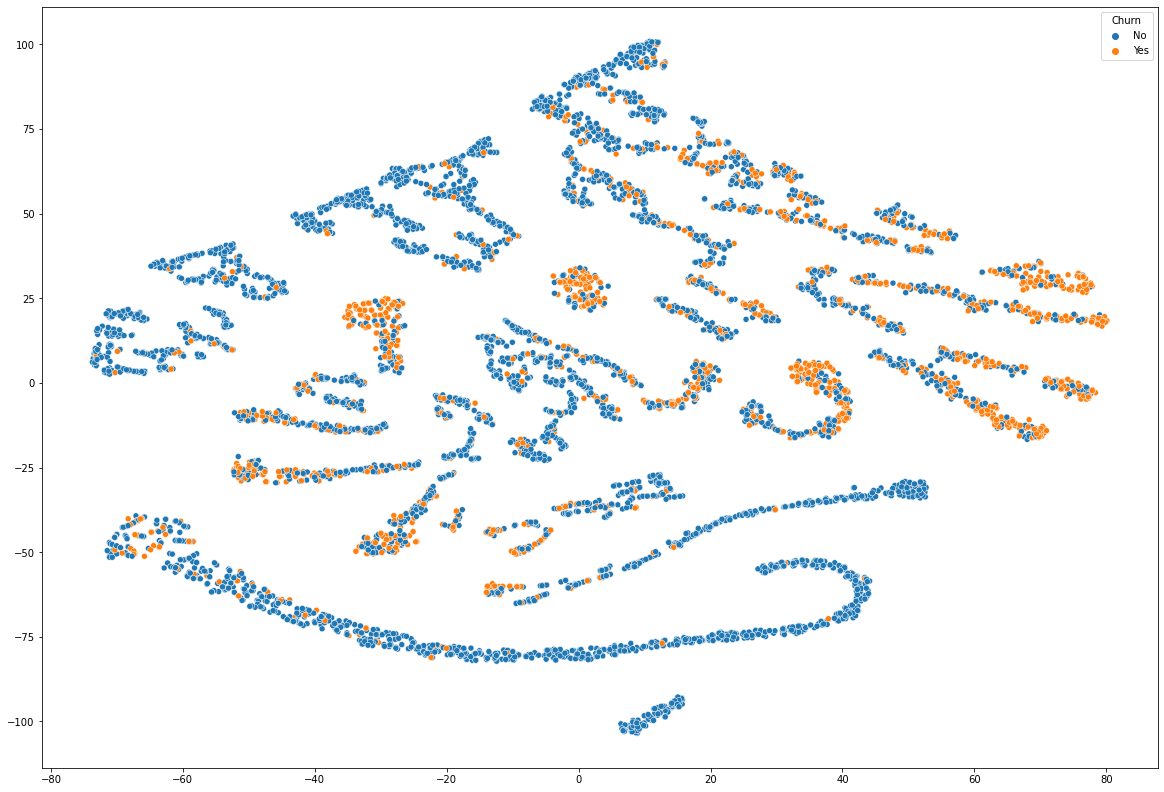

In [62]:
plt.figure(figsize=(20,14))
sns.scatterplot(x=data_clean_reduced[:,0], y=data_clean_reduced[:,1], hue=data_clean.Churn)
plt.show()

In [63]:
X = data_clean.drop('Churn', axis=1)

In [64]:
y = data_clean.Churn

In [65]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [66]:
linked = linkage(X, 'single')

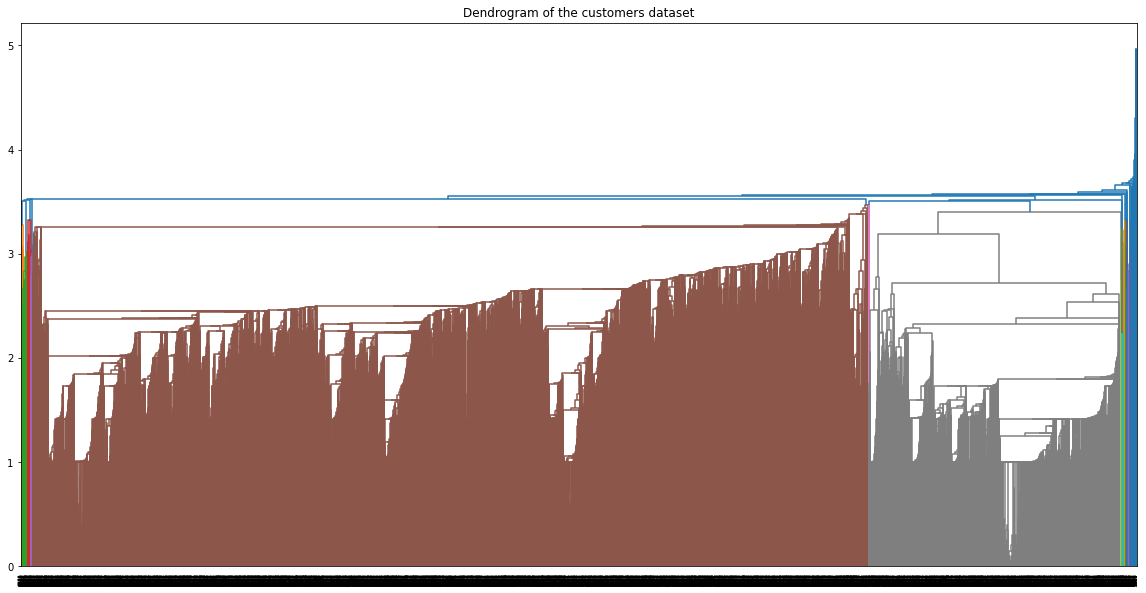

In [71]:
plt.figure(figsize=(20,10))

dendrogram(linked,
            distance_sort='descending',
            show_leaf_counts=True)

plt.title("Dendrogram of the customers dataset")
plt.show()

In [72]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters
                             =6, linkage="average")
labels = ac.fit_predict(X)
labels

array([4, 2, 2, ..., 4, 5, 1], dtype=int64)

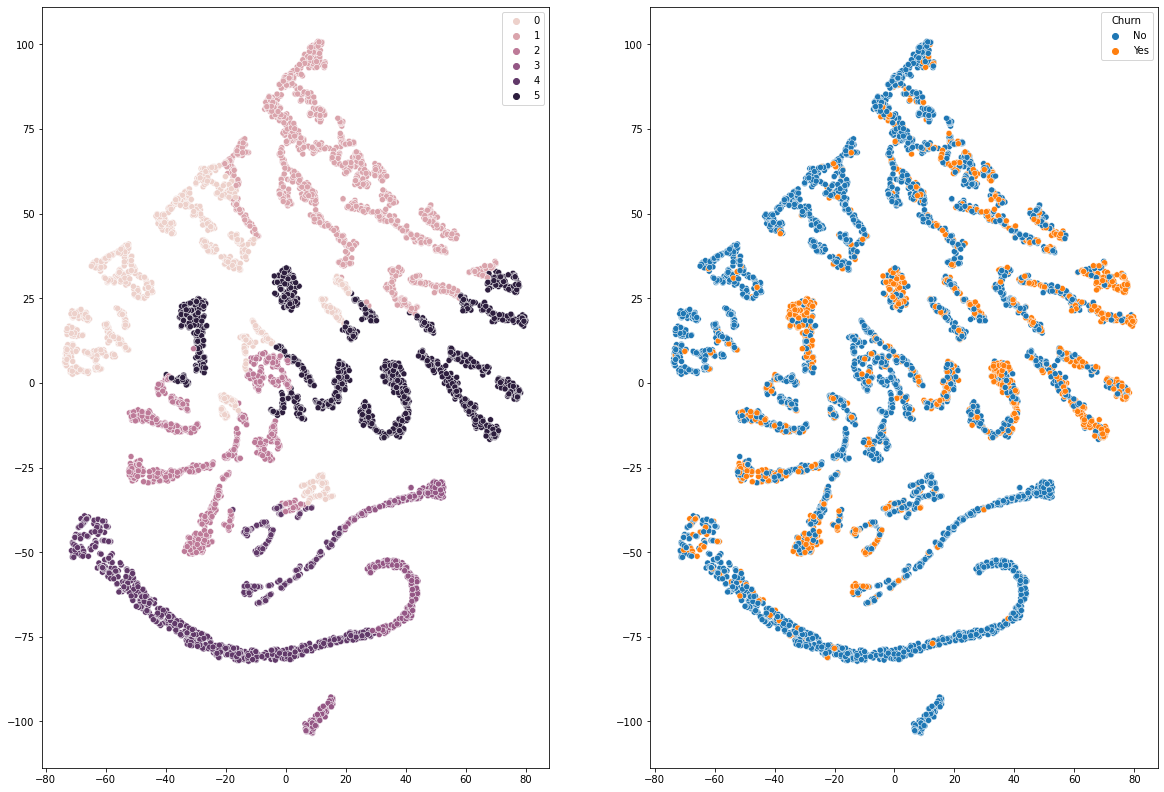

In [73]:
plt.figure(figsize=(20,14))
plt.subplot(121)
sns.scatterplot(x=data_clean_reduced[:,0], y=data_clean_reduced[:,1], hue=labels)
plt.subplot(122)
sns.scatterplot(x=data_clean_reduced[:,0], y=data_clean_reduced[:,1], hue=y)
plt.show()

In [74]:
import statistics as stat

In [75]:
y.iloc[list(np.where(labels==labels[5000])[0])]

8       Yes
12       No
13      Yes
14       No
15       No
       ... 
7022     No
7023     No
7034    Yes
7039     No
7042     No
Name: Churn, Length: 1450, dtype: object

In [76]:
predicted_labels = pd.Series([stat.mode(y.iloc[np.where(labels==labels[i])[0]]) for i in range(len(y))])

In [77]:
(predicted_labels.values == y.values).mean()

0.7602905569007264

In [78]:
(y[y.values == 'Yes'].values == predicted_labels[y.values == 'Yes'].values).mean()

0.485191168551427

In [79]:
X_clusters = pd.concat([X.reset_index(drop=True), pd.Series(labels, name='Cluster')], axis=1)

In [80]:
X_clusters

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,MultipleLines_No phone service,MultipleLines_Yes,...,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Cluster
0,0,0,1,0,1,0,1,29.85,1,0,...,1,0,0,0,0,0,0,0,0,4
1,1,0,0,0,34,1,0,56.95,0,0,...,0,0,1,0,0,0,0,0,0,2
2,1,0,0,0,2,1,1,53.85,0,0,...,1,0,0,0,0,0,0,0,0,2
3,1,0,0,0,45,0,0,42.30,1,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,0,2,1,1,70.70,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,1,0,1,1,24,1,1,84.80,0,1,...,0,0,1,0,1,0,1,0,1,5
7017,0,0,1,1,72,1,1,103.20,0,1,...,1,0,1,0,0,0,1,0,1,1
7018,0,0,1,1,11,0,1,29.60,1,0,...,0,0,0,0,0,0,0,0,0,4
7019,1,1,1,0,4,1,1,74.40,0,1,...,0,0,0,0,0,0,0,0,0,5


In [81]:
X_clusters.groupby('Cluster')['SeniorCitizen'].value_counts()

Cluster  SeniorCitizen
0        0                1055
         1                 176
1        0                1063
         1                 387
2        0                 878
         1                 105
3        0                 532
         1                  29
4        0                1113
         1                  55
5        0                1239
         1                 389
Name: SeniorCitizen, dtype: int64

In [82]:
X_clusters.groupby('Cluster')['Partner'].value_counts()

Cluster  Partner
0        1           825
         0           406
1        1           909
         0           541
2        0           666
         1           317
3        1           378
         0           183
4        0           743
         1           425
5        0          1080
         1           548
Name: Partner, dtype: int64

In [83]:
X_clusters.groupby('Cluster')['Dependents'].value_counts()

Cluster  Dependents
0        0              760
         1              471
1        0             1059
         1              391
2        0              722
         1              261
3        0              285
         1              276
4        0              751
         1              417
5        0             1334
         1              294
Name: Dependents, dtype: int64

In [84]:
X_clusters.groupby('Cluster')['MonthlyCharges'].mean()

Cluster
0     68.956093
1    101.993655
2     53.051272
3     21.901337
4     22.312628
5     81.113145
Name: MonthlyCharges, dtype: float64

## Churn prediction

In [85]:
X = X
#X = X_balanced

### Logistic Regression

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [89]:
pipe_logr = Pipeline([('scaler', StandardScaler()),
                  ('estimator', LogisticRegression(class_weight='balanced', random_state=42))])

In [90]:
pipe_logr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [91]:
y_pred = pipe_logr.predict(X_test)

In [92]:
y_pred_train = pipe_logr.predict(X_train)

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.89      0.73      0.80      1033
         Yes       0.50      0.76      0.61       372

    accuracy                           0.74      1405
   macro avg       0.70      0.74      0.71      1405
weighted avg       0.79      0.74      0.75      1405



In [95]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

          No       0.91      0.73      0.81      4131
         Yes       0.52      0.81      0.63      1485

    accuracy                           0.75      5616
   macro avg       0.72      0.77      0.72      5616
weighted avg       0.81      0.75      0.77      5616



### SVM

In [96]:
from sklearn.svm import SVC

In [97]:
pipe_svc = Pipeline([('scaler', StandardScaler()),
                  ('estimator', SVC(class_weight='balanced', random_state=42))])

In [98]:
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator', SVC(class_weight='balanced', random_state=42))])

In [99]:
y_pred = pipe_svc.predict(X_test)

In [100]:
y_pred_train = pipe_svc.predict(X_train)

In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.90      0.74      0.81      1033
         Yes       0.52      0.77      0.62       372

    accuracy                           0.75      1405
   macro avg       0.71      0.76      0.72      1405
weighted avg       0.80      0.75      0.76      1405



In [102]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

          No       0.92      0.75      0.83      4131
         Yes       0.54      0.83      0.66      1485

    accuracy                           0.77      5616
   macro avg       0.73      0.79      0.74      5616
weighted avg       0.82      0.77      0.78      5616



In [106]:
param_grid = {'estimator__C': scipy.stats.uniform(2e-5, 2e15), 'estimator__gamma': scipy.stats.uniform(2e-15, 2e3),
             'estimator__kernel' : ['polynomial', 'rbf'], 'estimator__degree': np.arange(3, 11)}

In [110]:
rangrid_svc = RandomizedSearchCV(pipe_svc, param_grid, n_jobs=-1)

In [ ]:
rangrid_svc.fit(X_train, y_train)

In [ ]:
print(classification_report(y_test, rangrid_svc.best_estimator_.predict(X_test)))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipe_rf = Pipeline([('scaler', StandardScaler()),
                  ('estimator', RandomForestClassifier(class_weight='balanced', random_state=42))])

In [ ]:
pipe_rf.fit(X_train, y_train)

In [ ]:
y_pred = pipe_rf.predict(X_test)

In [ ]:
y_pred_train = pipe_rf.predict(X_train)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(classification_report(y_train, y_pred_train))

### XGBoost

In [ ]:
import xgboost as xgb
xg = xgb.XGBClassifier(random_state=42)

In [ ]:
pipe_xgb = Pipeline([('scaler', StandardScaler()),
                  ('estimator', xgb.XGBClassifier(random_state=42))])

In [ ]:
pipe_xgb.fit(X_train, y_train)

In [ ]:
y_pred = pipe_xgb.predict(X_test)

In [ ]:
y_pred_train = pipe_xgb.predict(X_train)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(classification_report(y_train, y_pred_train))

### Retry Random Forest and XGBoost with less features

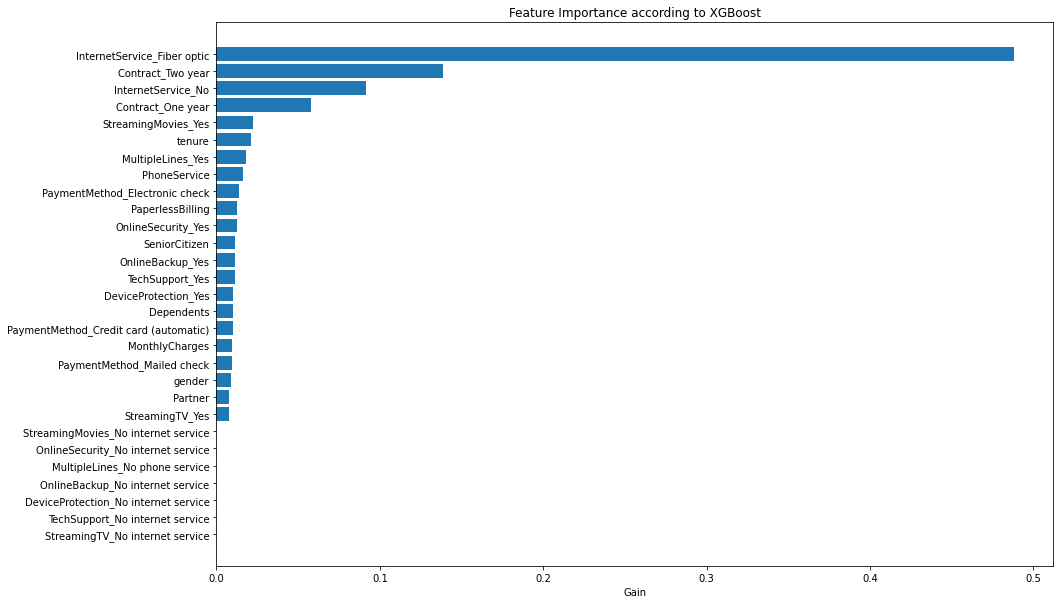

In [709]:
indices = np.argsort(pipe_xgb.named_steps['estimator'].feature_importances_)

plt.figure(figsize=(15, 10))
plt.barh(range(len(indices)), pipe_xgb.named_steps['estimator'].feature_importances_[indices], align='center')
plt.xlabel("Gain")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Feature Importance according to XGBoost')
plt.show()

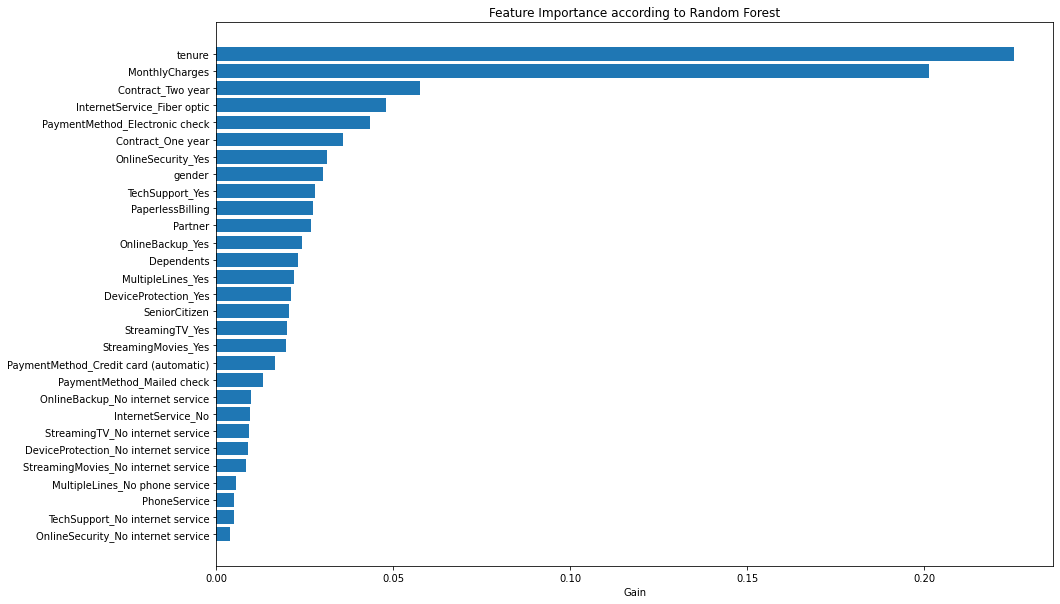

In [710]:
indices = np.argsort(pipe_rf.named_steps['estimator'].feature_importances_)

plt.figure(figsize=(15, 10))
plt.barh(range(len(indices)), pipe_rf.named_steps['estimator'].feature_importances_[indices], align='center')
plt.xlabel("Gain")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Feature Importance according to Random Forest')
plt.show()

In [711]:
X_select_feat = X[X.columns.drop(list(X.filter(regex='_No')))]

In [713]:
X_select_feat.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'MultipleLines_Yes', 'InternetService_Fiber optic', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [715]:
X_train, X_test, y_train, y_test = train_test_split(X_select_feat, y, test_size=.2, stratify=y, random_state=42)

#### Retrain Random Forest

In [760]:
pipe_rf = Pipeline([('scaler', StandardScaler()),
                  ('estimator', RandomForestClassifier(class_weight='balanced', random_state=42))])

In [761]:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [762]:
y_pred = pipe_rf.predict(X_test)

In [763]:
y_pred_train = pipe_rf.predict(X_train)

In [764]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.81      0.90      0.85      1033
         Yes       0.59      0.41      0.49       372

    accuracy                           0.77      1405
   macro avg       0.70      0.66      0.67      1405
weighted avg       0.75      0.77      0.75      1405



In [765]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00      4131
         Yes       0.99      1.00      0.99      1485

    accuracy                           1.00      5616
   macro avg       1.00      1.00      1.00      5616
weighted avg       1.00      1.00      1.00      5616



In [766]:
param_grid = ({'estimator__max_depth' : [50, 100, 200], 'estimator__min_samples_leaf' : [1, 3, 5], 'estimator__min_samples_split' : [5, 10, 20]})

In [767]:
from sklearn.model_selection import GridSearchCV

In [768]:
grid_rf = GridSearchCV(pipe_rf, param_grid, n_jobs=-1, scoring='f1_macro')

In [769]:
grid_rf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('estimator',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [50, 100, 200],
                         'estimator__min_samples_leaf': [1, 3, 5],
                         'estimator__min_samples_split': [5, 10, 20]},
             scoring='f1_macro')

In [770]:
grid_rf.best_params_

{'estimator__max_depth': 50,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 10}

In [771]:
print(classification_report(y_test, grid_rf.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

          No       0.87      0.83      0.85      1033
         Yes       0.59      0.66      0.62       372

    accuracy                           0.79      1405
   macro avg       0.73      0.75      0.74      1405
weighted avg       0.80      0.79      0.79      1405



#### Retrain XGBoost

In [739]:
pipe_xgb = Pipeline([('scaler', StandardScaler()),
                  ('estimator', xgb.XGBClassifier(random_state=42))])

In [740]:
import scipy

In [749]:
param_grid = ({'estimator__learning_rate' : scipy.stats.uniform(0, 1), 'estimator__max_depth' : np.arange(3,11)})

In [750]:
from sklearn.model_selection import RandomizedSearchCV

In [755]:
rangrid_xgb = RandomizedSearchCV(pipe_xgb, param_grid, n_jobs=-1, scoring='f1_macro')

In [756]:
rangrid_xgb.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('estimator',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type='gain',
                                                            interaction_constraints=None,
                                                            learning_rate=None,
                                                            max_de

In [757]:
rangrid_xgb.best_params_

{'estimator__learning_rate': 0.12389292087145842, 'estimator__max_depth': 4}

In [758]:
print(classification_report(y_test, rangrid_xgb.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1033
         Yes       0.65      0.49      0.56       372

    accuracy                           0.80      1405
   macro avg       0.74      0.70      0.72      1405
weighted avg       0.78      0.80      0.79      1405



## Data augmentation

In [783]:
from imblearn.over_sampling import RandomOverSampler

In [817]:
ros = RandomOverSampler(sampling_strategy=0.6, random_state=42)

In [818]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)

In [819]:
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [820]:
pipe_svc = Pipeline([('scaler', StandardScaler()),
                  ('estimator', SVC(class_weight='balanced', random_state=42))])

In [821]:
pipe_svc.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator', SVC(class_weight='balanced', random_state=42))])

In [822]:
y_pred = pipe_svc.predict(X_test)

In [823]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.90      0.75      0.82      1033
         Yes       0.53      0.77      0.63       372

    accuracy                           0.76      1405
   macro avg       0.71      0.76      0.72      1405
weighted avg       0.80      0.76      0.77      1405



In [825]:
from imblearn.over_sampling import SMOTE

In [834]:
X_train_smote, y_train_smote = SMOTE(sampling_strategy=0.6, random_state=42).fit_resample(X_train, y_train)

In [835]:
pipe_svc.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator', SVC(class_weight='balanced', random_state=42))])

In [836]:
y_pred = pipe_svc.predict(X_test)

In [837]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.89      0.78      0.83      1033
         Yes       0.54      0.73      0.62       372

    accuracy                           0.76      1405
   macro avg       0.71      0.75      0.72      1405
weighted avg       0.79      0.76      0.77      1405

